# Boston Housing Price Prediction

 Here we are taking an amazing dataset from kaggle which is called as boston housing dataset and the main aim of this project is we really need to predict the price of the house based on various features.


First We need to import the important libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Lets load the Boston House Pricing Dataset**  

this dataset is already present in a sk-learn library so we will import from that only.    

In [2]:
from sklearn.datasets import load_boston

In [3]:
# creating an object of the package
boston = load_boston()

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

**WHAT IS DESCR in this keys?**   

it is the entire description of the dataset.

In [6]:
## lets check the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**So this the entire information abour this dataset**   
   





## preparing the dataset

In [7]:
# key = data in package contains all the data and we can access it using boston.data and have to create a Dataframe using
# pd.DataFrame function

dataset = pd.DataFrame(boston.data)

In [8]:
# .head() will return top 5 records by default

dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**here you can see we have the data but we don't have column names so how can we putup all the columns names here?**  

there are 2 ways to do it

1) in pandas there is a class **pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)** in this there is an attribute called **columns=None**  so we can pass value to this attribute. We have values present in our boston.keys()

In [9]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)

In [10]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


here we got the columns names but still we are missing the output feature or say dependent variable because all this record are indepedent features  

we all know that there are 2 types of features available in our data independent and depedent/target.  

#### Q) what is independent and dependent features in a dataset?  

name suggests Independent feature means whose value doenot changes with the change in the values of other features.  
and Dependent feature means those feature whose values changes when any other value changes.  

Our dependent feature is present in **boston.target**  

#### How do we create a column which will be the dependent variable and in this case "PRICE" is our dependent variable

we will create a new column using **data['columnname']** and assign it to the boston.target

In [11]:
dataset['Price'] = boston.target

In [12]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


so here our dataset is ready contains dependent feature PRICE also

### now what we have to do with this dataset is that do some kind of quick analysis which is very important to know more about the dat

for that we can use some inbuuilt functions like  

1) ***data.info()***  

#### so what will this function do??  
it is basically going to talk about  
1) no of entries means number of records. here there are **506 records (0 to 505)**   

2) Data columns means number of columns in dataset. here there are **14 columns**   

3) what are the data types of the columns that are present in the dataset like here all are **flaoat64**   

4) then in each row out of total number of records i.e. entries, how many records are non null. this is very imp because it'll show if there's any empty or null records are present in you data. here you can see in every column there are **506 non null** records means **out of 506 records there are 506 non-null records means there is 0 empty records in your dataset**

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


####  Q)now one question here our data is of which type Numerical Data or Categorical Data?  

as we can see data tye of every column is **float** means all the values are in numbers so data is **numerical data**

 
2) ***data.describe()***

#### Q) what will this function do?  

it will return the **Summary statistics of the Series or Dataframe provided.**  

For numeric data, the result’s index will include **count**, **mean**, **std**, **min**, **max** as well as **lower**, **50** and **upper percentiles** for every column present in dataset

#### Q) what is by default value of Lower and Upper Percentile?

By default the l**ower percentile is 25** and the **upper percentile is 75**. The **50 percentile is the same as the median**.






In [14]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Q) what are all of these Value?  

1) **count** - return Count number of non-NA/null observations.  

2) **mean** - return Mean of the values.

3) **std** -  return Standard deviation of the observations.

4) **min** - return Minimum of the values in the object.

5) **max** - return Maximum of the values in the object.

#### now most important step is to check missing values in dataset



In [15]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

here you can see there it returns **0** means **no missing values** and as we saw above in **data.info()** we know that our dataset contains no null values

### Now next step is "Exploratory Data Analysis" (EDA)  



as you know over here we dont have any missing values and all the data are floating point numbers so the best thing in the case of regression problem statement the first that you should definitely run is related to correlation. 

#### Q) what is correlation 

<img src="correlation.jfif" width="300" height="500">  

Correlation (to be exact Correlation in Statistic) is a measure of a mutual relationship between two variables whether they are causal or not. This degree of measurement could be measured on any kind of data type (Continous and Continous, Categorical and Categorical, Continous and Categorical)  

We really need to find out how the independent features nad my output features are correlated. If they are highly positively correlated or highly negative correlated then this basically indicates that our model performance will definitely be high.  

It is one of the super important property with respect to linear regression.

In [16]:
# to find correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


There are 4 methods of correlation  
1) Pearson  
2) Kendall  
3) Spearman  
4) Callable  

if you click **Shift+Tab** in the correlation function cell you'll find the docstring   

**Signature**: dataset.corr(method='pearson', min_periods=1)  

**Docstring**:
Compute pairwise correlation of columns, excluding NA/null values.  

as you can see the **by default method of correlation is PEARSON**  

#### Q) what is Pearson Correlation?  

Pearson correlation basically checks the relationship between 2 features X and Y in such a way that it'll say that whether the 2 features are highly correlated or it is not at all correlated to each other  

Usually the output of the Pearson correlation ranges between **-1 to +1**.  The more towards the value **towards +1**, more the features are  **positively correlated to each other** and vice a versa for values more towards the **-1**. If they are near to **0** they are **Hardly Correlated to each other**.



  



now here the **two types of correlation that you really need to check the correlation between independent feature and the correlation between independent and the dependent feature**  

if there is a high correlation between independent features at that point of time you can remove one of the independent features because that is what is called as multi-collinearity  


so in linear regression also we really need to check  
#### Q) what is multicollinearity?  
 
it basically means that **if my two independent features are** very highly correlated let's say they're correlated by 0.95 percent 0.96 percent you know or negative 0.95 0.96 means if that is **highly positively correlated or highly negatively correlated** what we can do with respect to the independent features **we can drop one of the independent feature and we can just take the other one the other correlation**  


we really need to focus on is that **correlation between our independent features and our output feature that is price** now here you can see if let's take this example CRIM and PRICE these are like negatively correlated by 0.38 like minus 0.38 so somewhere around 38 percent similarly  

if we see ZN with respect to price it is nothing but 0.36  

right now what is let's say what is the CRIM basically says that it is the per capita crime rate by town so obvisouly if this will increase then Price will definitely decrease because who wants to live in the area where crime rates are higher so price will automatically go down which is showing by -ve correlation

## Let's analyze correlation using plots

In [17]:
# seaborn is library used to create graphs
import seaborn as sns


## Analyzing The Correlated Features

Here we will create a Scatter plot and will try to analyze the relation between CRIM and PRICE feature.  

#### Q) what is scatter plot?  
Scatter plots are the graphs that represent the relationship between two variables in a data-set.  

you can create scatter plot using **plt.scatter(x,y)** where x and y are features you want to compare here x is CRIM and y is PRICE.  

you can also give the column names using **plt.xlabel("name")** which will Set the label for the x-axis and for y-axis **plt.ylabel("name")**  

Text(0, 0.5, 'Price')

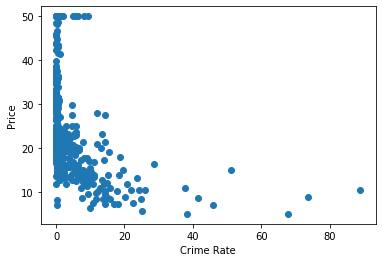

In [18]:
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price") 

You can clearly see from the graph that **as the Crime Rate keeps on increasing, Price keeps on decreasing** means they both are **inversly correlated to each other**

Text(0, 0.5, 'Price')

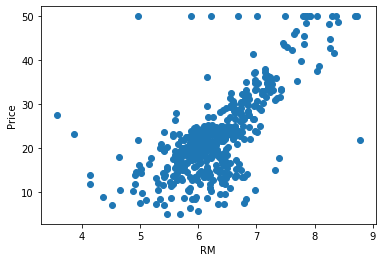

In [19]:
# graph between RM (average number of rooms per dwelling) and price
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel("RM")
plt.ylabel("Price")


Here you can see that **as RM increases, price also increase** beacause obviously **more the number of rooms, more the price of house**  that is why you can see the correaltion between RM and Price is **0.69** which is positive

Now let's create a Regression Plot  

#### Q) what is Regression Plot?  
This method is used to **plot data and a linear regression model fit**.   
It is same as Scatter plot but here we are also adding best fit line of the Linear Regression

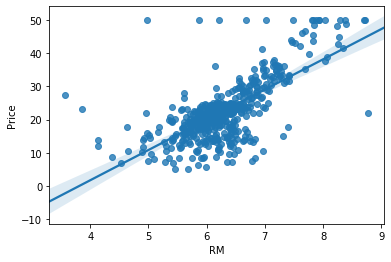

In [20]:
sns.regplot(x="RM",y="Price",data=dataset)

Here you can see that there is **positive correlation between RM and PRice**

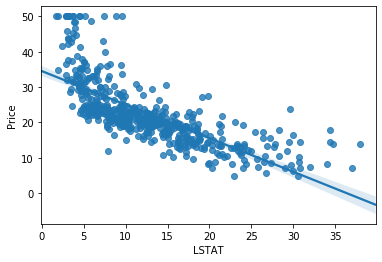

In [21]:
# now let's check for LSTAT (% lower status of the population)

sns.regplot(x="LSTAT",y="Price",data=dataset)


Here you can see **higher the LSTAT(lower the status of population), lower the price** because it is obvious **where the high status people live, price will be higher at that area**

That is how Scatter plot helps us to understand the relation between features. 

### Now let's prepare the independent and dependent feature and store in the variable X and y

In [22]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

#### Q) what is iloc??  
it is the Pandas module that helps us **to select a specific row or column from the data set**. Using the iloc() function in python, we can easily retrieve any particular value from a row or column using index values.  


Here we know the Price is our Depenedent Feature and everything else is independent features so   

we will perform Slicing to seperate independent and dependent features  
[:,:-1] this will select all the features excluding the last one which is PRICE  

[:,-1] this will select only last feature which is PRICE



In [23]:
# all independent features
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
# dependent feature
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

## Train Test Split  

#### Q) what is Train Test Split?? 
It's a **process to split your data into Training Data and Testing Data**.  
**Training data is**, as the name suggests, **used to train your model**. **Test data** is the **unknown data that the model hasn’t seen during the training**

In [25]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

**sklearn.model_selection** contains a **train_test_split() function** that is used to split your data in training and test sets.  

**test_size = 0.3** which indicates that **30% of our data is for testing** and remaining 70% is for training, w can change that as per our need

here we created Test data and training data for both Independent and Dependent feature means X and y

In [26]:
# training data of independent feature
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [27]:
# testing data of independent feature
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22


## Standard Scaling  

#### Q) what  is Standardization?   

Standardization is an important technique that is mostly performed as a pre-processing step before many machine learning models, **to standardize the range of features of an input data set**.   

Standardization comes into the picture when features of the input data set have large differences between their ranges, or simply when they are measured in different units (e.g., pounds, meters, miles, etc.).

Simply to fit our input features in the same range so that model will perform better

In [28]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 

In [29]:
# transforming our training dataset usign scaler.fit_transform
X_train=scaler.fit_transform(X_train)

In [30]:
# transforming our testing dataset usign scaler.fit_transform

X_test=scaler.transform(X_test)


In [31]:
X_train


array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [32]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

## Model Training  
here we are performing Linear Regression so let's understand it first.  
### Linear Regression   

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. The regression line is the best fit line for our model.   

Hypothesis function for Linear Regression :
<img src = "lr.jpg">  

what this model does is that while training on given traininf data it fits the best line to predict the value of y for a given value of x.  

The model gets the best regression fit line by finding the best θ1 and θ2 values.  

θ1 is intercept θ2 is coefficient of x.  Once we find the best θ1 and θ2 values, we get the best fit line. So when we are finally using our model for prediction, it will predict the value of y for the input value of x.  

It is very important to update the values of θ1 and θ2 such that the difference between Predicted Y value and true Y value is minimum.   

In this case our model will predict the value of PRICE (y) and we have to check with our actualu value of PRICE and we'll compare. if the difference will be high then we'll update the values of theta 1 and theta 2 till we minimize the difference between predicted and actual values   

Difference between predicted and actual values is called Cost function and our main aim is to minimize the cost Function.   

<img src = "cf.jpg">  

Cost function(J) of Linear Regression is the Root Mean Squared Error (RMSE) between predicted y value (pred) and true y value (y)  


To update θ1 and θ2 values in order to reduce Cost function (minimizing RMSE value) and achieving the best fit line, the model uses Gradient Descent. The idea is to start with random θ1 and θ2 values and then iteratively updating the values, reaching minimum cost.

In [33]:
# we have to import model from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [34]:
# initilizing the model and creating an object names=d regression

regression=LinearRegression()

In [35]:
# now we'll train our model using object name.fit and pass our training data

regression.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
## print the coefficients and the intercept

# coefficient is nothing but value of theta 2
print(regression.coef_)


[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


**coefficient means value with X**. Here X is our dependent features so here these all values are associated with every dependent feature. 

Means **coefficient of CRIM which is our 1st dependent feature is -1.108**  
it indicates that if the Value of **CRIM will increase the PRICE will be decrease by -1.108 value**. 

In [37]:
# intercept  is nothing but value of theta 1
print(regression.intercept_)


23.01581920903955


intercept we all have learned in school, it is basically a SLOPE of the graph

In [38]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

## Prediction with Test Data

In [39]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

here we are making prediction using .predict() function on our test data and store it in a  variable reg_pred

In [40]:
reg_pred


array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

now one important thing with respect to predictions is that first of all whenever we get any predictions we can definitely compare this with the y test information because for the x test y test is the true value right so how do we check like what all information or how whether this model has actually performed or not okay  

so i'm just going to plot some of the important diagrams uh which will basically help you to understand that okay the kind of predictions that you have got from the model it is it good or bad
 


## Assumptions

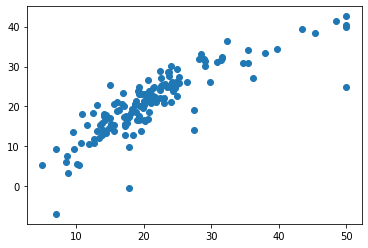

In [41]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

here you'll be able to see that the plotting of the values that you'll be seeing it is **basically linear in nature**. Whenever the plotting is in **linear that basically means that your model had actually performed right**. 

In [42]:
# residuals means error or difference between test data and predicted value

residuals = y_test - reg_pred

residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: Price, Length: 152, dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1627098714574053
21.51744423117721
4.6386899261728205


## Performance Metrics  

### R square   

Formula  
**R^2 = 1 - SSR/SST**

R^2= coefficient of detemination  
SSR = sum of the square of the residuals  
SST = total sum of squares

In [44]:

from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.7112260057484932


we are getting 71 which is quite good

### Adjusted R Square  

Formula  
**Adjusted R2 = 1 - [(1-R2) * (n-1)/(n-k-1)]**  

R2 = the R2 of model  
n = the number of observations  
k = the number of predictor variables

for adjusted r2 we don't have any libraries so we have to calculate it manually.  



In [45]:
1- (1-score)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1] - 1)

0.6840226584639308

## Now make Prediction On New Data

let's make prediction using only single values of independent features.  

above when we made predictioon we used the entire bulk of data but let's make prediction using single data.   

boston.data will return all the values but we need only first values so we will do boston.data[0]  

In [46]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [47]:
# let's check the shape

boston.data[0].shape

(13,)

here you can notice its 1D but we have to pass 2D array to our model so we have to reshape our data.  

We have 13 independent features and we want only one values of each so we basically need 13 columns and 1 row.

In [48]:
boston.data[0].reshape(1,-1).shape

(1, 13)

here we go we have 2D array  
now we have to standardize this data before making predictions  


In [49]:
# transformation of new data
scaler.transform(boston.data[0].reshape(1,-1))

array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [50]:
# now make prediction

regression.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([30.08649576])

In [51]:
import pickle 


In [54]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [55]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [56]:
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([30.08649576])